In [1]:
# import packages
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.express as px
import os
import glob

## Read input

In [4]:
# read taxonimy annotation for the best genomes from cluster
gt = pd.read_csv('input/gtdbtk.bac120.summary.tsv', sep='\t')
gt = gt[['user_genome','classification','fastani_ani','closest_placement_reference','closest_placement_ani']]

gt['domain'] = gt['classification'].str.split(';', expand=True)[0].str.replace(r'd__', '')
gt['phylum'] = gt['classification'].str.split(';', expand=True)[1].str.replace(r'p__', '')
gt['class'] = gt['classification'].str.split(';', expand=True)[2].str.replace(r'c__', '')
gt['order'] = gt['classification'].str.split(';', expand=True)[3].str.replace(r'o__', '')
gt['family'] = gt['classification'].str.split(';', expand=True)[4].str.replace(r'f__', '')
gt['genus'] = gt['classification'].str.split(';', expand=True)[5].str.replace(r'g__', '')
gt['sp'] = gt['classification'].str.split(';', expand=True)[6].str.replace(r's__', '')
gt = gt.drop('classification', axis=1)

gt.tail(2)


,user_genome,fastani_ani,closest_placement_reference,closest_placement_ani,domain,phylum,class,order,family,genus,sp
2255,VZXIHP_vamb.13313,98.08,GCA_905201055.1,98.08,Bacteria,Pseudomonadota,Gammaproteobacteria,Burkholderiales,Burkholderiaceae_A,Aphodousia,Aphodousia sp905201055
2256,VZXIHP_vamb.28684,NaN,GCA_900761895.1,82.01,Bacteria,Bacillota_A,Clostridia,Christensenellales,HGM11417,HGM11417,


In [9]:
# read the info about all bins
all_bins = pd.read_excel('FINAL_tables/FINAL_all_bins_all_clusters_m.xlsx')
clusters_info = all_bins[['recovered_genome_name','2nd_clustering_cluster']]
clusters_info.head(2)

,recovered_genome_name,2nd_clustering_cluster
0,V00H9L_vamb.216248.fa,1737_1
1,VEZUDR_vamb.198244.fa,1737_1


In [19]:
# read the info about the best genomes in cluster
bst = pd.read_excel('FINAL_tables/FINAL_only_the_best_genomes.xlsx')
# add info about 2nd clustering cluster
bst = bst.merge(clusters_info, left_on='best_cluster_genome', right_on='recovered_genome_name', how='left')
bst = bst.drop(['N','recovered_genome_name'], axis=1)
bst = bst.drop_duplicates()

#bst.to_excel('FINAL_tables/FINAL_only_the_best_genomes_with_2nd_cluster.xlsx', index=False)
bst.head(2)

,best_cluster_genome,sample_name,completeness,contamination,strain_heterogeneity,length,N50,Bin_qual,1st_clustering_part,1st_clustering_cluster,1st_clustering_centrality,2nd_clustering_cluster
0,V00H9L_vamb.216248.fa,V00H9L,96.55,1.72,0.0,2439293,206313,HQ,p6,p6-487_1,0.971814,1737_1
1,V010T4_maxbin.052.fa,V010T4,98.28,0.00,0.0,2472853,81610,HQ,p9,p9-685_1,0.000000,1010_1


In [27]:
# add info about taxonomy to the best genomes in cluster
bst['genome'] = bst['best_cluster_genome'].str.replace(r'.fa', '')
bst = bst.merge(gt, left_on='genome', right_on='user_genome', how='left')

#bst.to_excel('FINAL_tables/FINAL_only_the_best_genomes_with_2nd_cluster_with_taxa.xlsx', index=False)
#bst = pd.read_excel('FINAL_tables/FINAL_only_the_best_genomes_with_2nd_cluster_with_taxa.xlsx')
bst.head(2)

,best_cluster_genome,sample_name,completeness,contamination,strain_heterogeneity,length,N50,Bin_qual,1st_clustering_cluster,1st_clustering_centrality,...,closest_placement_reference,closest_placement_ani,domain,phylum,class,order,family,genus,sp,GTDBv214_taxa_notes
0,VLB6XN_256644.fa,VLB6XN,96.55,3.45,0.0,2869579,106856,HQ,p1-629_1,0.0,...,GCA_012519695.1,97.94,Bacteria,Bacillota_A,Clostridia,Lachnospirales,Lachnospiraceae,14-2,14-2 sp012519695,NaN
1,VDFRDM_metabat.13.fa,VDFRDM,89.66,0.00,0.0,3369048,49428,MQ,p5-586_1,0.0,...,GCA_934434905.1,95.51,Bacteria,Bacillota_A,Clostridia,Lachnospirales,Lachnospiraceae,14-2,14-2 sp934434905,NaN


In [28]:
# add info about number of bins in each cluster
clasters_number = all_bins['2nd_clustering_cluster'].value_counts().reset_index()
clasters_number.columns = ['cluster','number_of_bins']
clasters_number.head(2)

bst = bst.merge(clasters_number, left_on='2nd_clustering_cluster', right_on='cluster', how='left')
bst.to_excel('FINAL_tables/FINAL_only_the_best_genomes_with_2nd_cluster_with_taxa_with_binsNmb.xlsx', index=False)

,cluster,number_of_bins
0,591_1,1216
1,671_1,1083


## Analisys

In [34]:
bst = pd.read_excel('FINAL_tables/FINAL_only_the_best_genomes_with_2nd_cluster_with_taxa_with_binsNmb_m.xlsx')

## Visualization

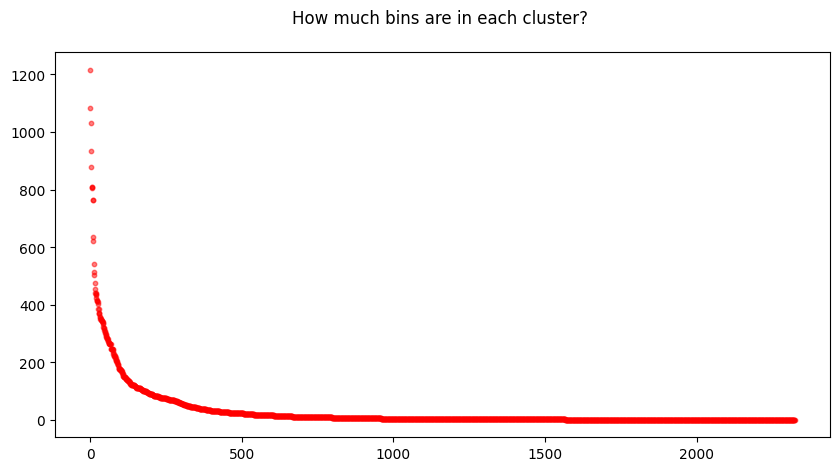

In [46]:
plt.figure(figsize=(10, 5))
plt.scatter(mrg.index, mrg1['bin_in_cluster'], s=10, alpha=0.5, color='red')

#plt.xticks(rotation=90)
#plt.xlabel('Secondary cluster')
#plt.ylabel('Number of bins per cluster')
plt.title('How much bins are in each cluster? \n')

plt.savefig('results/FINAL_clusters.png', dpi=300, bbox_inches='tight')

In [54]:
import plotly.express as px

fig = px.sunburst(
    mrg1,
    path=['phylum', 'class', 'order', 'family'],
    values='bin_in_cluster',
    title="Final CLUSTRS best genome, \n GTDB, release214",
    width=750, 
    height=750
)

fig.write_html("Final_CLUSTRS_best.html")


/Users/ketpantuh/Library/Python/3.8/lib/python/site-packages/plotly/express/_core.py:1574: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/ketpantuh/Library/Python/3.8/lib/python/site-packages/plotly/express/_core.py:1574: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/ketpantuh/Library/Python/3.8/lib/python/site-packages/plotly/express/_core.py:1574: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/ketpantuh/Library/Python/3.8/lib/python/site-packages/plotly/express/_core.py:1574: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/ketpantuh/Library/Python/3.8/lib/python/site-packages/plotly/express/_core.py:1574: Futur

In [65]:
mrg1['phylum'].value_counts()


Bacillota_A          1261
Bacteroidota          341
Bacillota             216
Pseudomonadota        161
Cyanobacteriota        78
Actinomycetota         76
Verrucomicrobiota      58
Bacillota_C            46
Desulfobacterota       30
Campylobacterota       12
Bacillota_B            10
Spirochaetota          10
Elusimicrobiota         8
Fusobacteriota          7
Synergistota            5
Myxococcota             1
Eremiobacterota         1
Bacillota_G             1
Patescibacteria         1
Fibrobacterota          1
Name: phylum, dtype: int64

In [68]:
mrg2 = mrg1[mrg1['phylum'] == 'Pseudomonadota']

fig = px.sunburst(
    mrg2,
    path=['class', 'order', 'family', 'genus', 'sp'],
    values='bin_in_cluster',
    title="Final CLUSTRS best genome, \n GTDB, release214",
    width=750, 
    height=750
)

fig.write_html("taxa_results/Final_CLUSTRS_best_Pseudomonadota.html")
fig.show()

/Users/ketpantuh/Library/Python/3.8/lib/python/site-packages/plotly/express/_core.py:1574: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/ketpantuh/Library/Python/3.8/lib/python/site-packages/plotly/express/_core.py:1574: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/ketpantuh/Library/Python/3.8/lib/python/site-packages/plotly/express/_core.py:1574: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/ketpantuh/Library/Python/3.8/lib/python/site-packages/plotly/express/_core.py:1574: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/ketpantuh/Library/Python/3.8/lib/python/site-packages/plotly/express/_core.py:1574: Futur

In [69]:
mrg3 = mrg1[mrg1['bin_in_cluster'] > 18]

fig = px.sunburst(
    mrg3,
    path=['class', 'order', 'family', 'genus', 'sp'],
    values='bin_in_cluster',
    title="Final CLUSTRS best genome, \n GTDB, release214",
    width=750, 
    height=750
)

fig.write_html("taxa_results/Final_CLUSTRS_best_prev1.html")
fig.show()

/Users/ketpantuh/Library/Python/3.8/lib/python/site-packages/plotly/express/_core.py:1574: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/ketpantuh/Library/Python/3.8/lib/python/site-packages/plotly/express/_core.py:1574: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/ketpantuh/Library/Python/3.8/lib/python/site-packages/plotly/express/_core.py:1574: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/ketpantuh/Library/Python/3.8/lib/python/site-packages/plotly/express/_core.py:1574: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/ketpantuh/Library/Python/3.8/lib/python/site-packages/plotly/express/_core.py:1574: Futur